# Classifier

### Classification refers to the process of using the characteristics of data to separate it into a certain number of classes.
### A supervised learning classifier builds a model using labeled training data and then uses this model to classify unknown data.

In [37]:
#Simple Regression Claissifer
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7],[4,-1]])
y = [0, 1, 1, 0, 0, 1, 1, 0]
class_0 = np.array([X[i] for i in range(len(X)) if y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i]==1])

plt = figure(plot_width=800, plot_height=400)

plt.circle(class_0[:,0], class_0[:,1], color='red', size=15)
plt.square(class_1[:,0], class_1[:,1], color='black', size=15)
line_x = range(10)
line_y = line_x
plt.line(line_x, line_y, color='black', line_width=2)
show(plt)

Loading BokehJS ...

## Logistic Regression
### Despite the word regression being present in the name, logistic regression is actually used for classification purposes. Given a set of datapoints, our goal is to build a model that can draw linear boundaries between our classes. It extracts these boundaries by solving a set of equations derived from the training data.

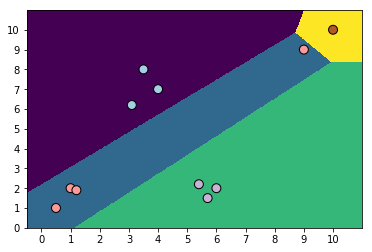

In [98]:
import numpy as np
from sklearn import linear_model
from bokeh.io import output_notebook,show
from bokeh.plotting import figure
plt = figure(plot_width=800, plot_height=400)
import matplotlib.pyplot as plt

X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2],[10,10],[9,9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2,3,1])
classifier = linear_model.LogisticRegression(solver='liblinear',C=100000)
classifier.fit(X, y)

def plot_classifier(classifier,X,y):
# define ranges to plot the figure
    x_min, x_max = min(X[:, 0])- 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1])- 1.0, max(X[:, 1]) + 1.0
    step_size = 0.02
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape)
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black',linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:,0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:,1])+1), 1.0)))
    plt.show()
    
plot_classifier(classifier, X,y)

[0.         1.33333333 2.66666667 4.        ] [0.         1.33333333 2.66666667 4.        ]
[array([[0.        , 1.33333333, 2.66666667, 4.        ],
       [0.        , 1.33333333, 2.66666667, 4.        ],
       [0.        , 1.33333333, 2.66666667, 4.        ],
       [0.        , 1.33333333, 2.66666667, 4.        ]]), array([[0.        , 0.        , 0.        , 0.        ],
       [1.33333333, 1.33333333, 1.33333333, 1.33333333],
       [2.66666667, 2.66666667, 2.66666667, 2.66666667],
       [4.        , 4.        , 4.        , 4.        ]])]
[0.         1.33333333 2.66666667 4.         0.         1.33333333
 2.66666667 4.         0.         1.33333333 2.66666667 4.
 0.         1.33333333 2.66666667 4.        ]
[[0.         0.        ]
 [1.33333333 0.        ]
 [2.66666667 0.        ]
 [4.         0.        ]
 [0.         1.33333333]
 [1.33333333 1.33333333]
 [2.66666667 1.33333333]
 [4.         1.33333333]
 [0.         2.66666667]
 [1.33333333 2.66666667]
 [2.66666667 2.66666667]


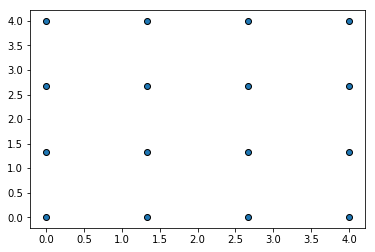

In [114]:
nx, ny = (3, 2)
x = np.linspace(0, 4, 4)
y = np.linspace(0, 4, 4)
print(x,y)
print(np.meshgrid(x, y))
x,y=np.meshgrid(x, y)
print(x.ravel())
print(np.c_[x.ravel(), y.ravel()])
plt.scatter(x,y, edgecolors='black',linewidth=1, cmap=plt.cm.Paired)

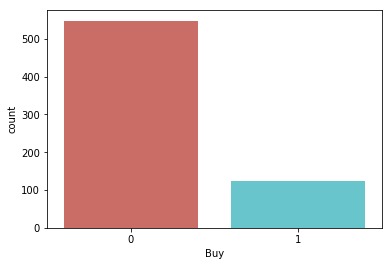

array([[106,   8],
       [  3,  18]])

In [159]:
##Example https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
kidDataset = pd.read_csv("Kid.csv")
kidDataset.head()
kidDataset=kidDataset.drop(columns=['Obs No.'])
kidDataset.isnull().sum()
kidDataset.Buy.value_counts()
sns.countplot(x = 'Buy', data = kidDataset, palette = 'hls')
plt.show()
X = kidDataset[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = kidDataset['Buy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

### Model Evaluation using Confusion Matrix
#### Let’s talk about the confusion matrix little bit. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
#### Few terms to remember in the context of confusion matrix, refer the table below:
#### true positives (TP): These are cases in which we predicted yes and are actually yes.
#### true negatives (TN): We predicted no, and no in actual.
#### false positives (FP): We predicted yes, but actual is no. (Type I error)
#### false negatives (FN): We predicted no, yes in actual. (Type II error)

### Confusion matrix
#### There is also a list of rates that are often computed from a confusion matrix for a binary classifier:
#### Accuracy: Overall, how often is the classifier correct?
#### Accuracy = (TP+TN)/total
#### Misclassification Rate(Error Rate): Overall, how often is it wrong?
#### Misclassification Rate = (FP+FN)/total
#### True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes?
#### True Positive Rate = TP/actual yes
#### False Positive Rate: When it’s actually no, how often does it predict yes?
#### False Positive Rate=FP/actual no
#### True Negative Rate(Specificity): When it’s actually no, how often does it predict no?
#### True Negative Rate=TN/actual no
#### Precision: When it predicts yes, how often is it correct?
#### Precision=TP/predicted yes
#### Prevalence: How often does the yes condition actually occur in our sample?
#### Prevalence=actual yes/total

Accuracy: 0.9185185185185185
Precision: 0.6923076923076923
Recall: 0.8571428571428571


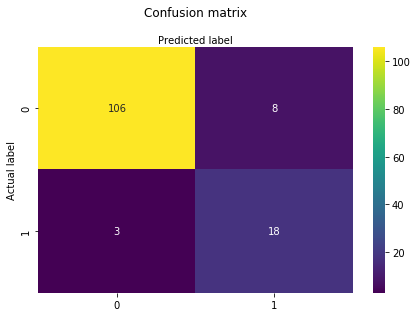

In [160]:
fig, ax = plt.subplots()
class_names=['TP','TN','FP','FN']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

### ROC Curve
#### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. It shows the tradeoff between sensitivity and specificity.

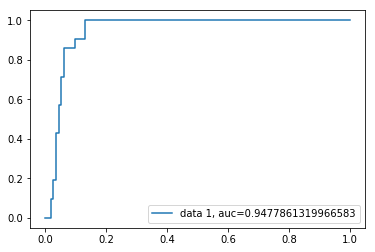

In [161]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### A Multiclass logistic regression 

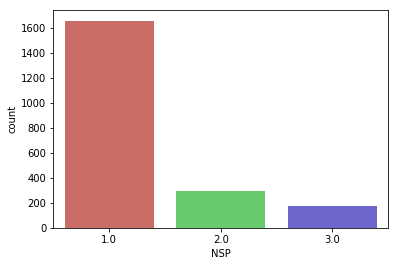

Accuracy: 0.9741784037558685
Area under curve :  0.9572285098184548


In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

from sklearn import metrics
data=pd.read_excel('CTG.xls',sheet_name='Raw Data')
dataset_rmvCol = data.drop(columns=['FileName', 'SegFile', 'Date'])
finaldata = dataset_rmvCol.dropna()
sns.countplot(x = 'NSP', data = finaldata, palette = 'hls')
plt.show()
X = finaldata[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = finaldata['NSP']
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=.2,random_state=0)
logreg = LogisticRegression().fit(x_train,y_train)
y_pred=logreg.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

### Advantages and Disadvantages of Logistic Regression
### Advantages :
#### It is a widely used technique because it is very efficient, does not require too many computational resources, it’s highly interpretable, it doesn’t require input features to be scaled, it doesn’t require any tuning, it’s easy to regularize, and it outputs well-calibrated predicted probabilities.
#### Logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other. Therefore Feature Engineering plays an important role in regards to the performance of Logistic and also Linear Regression.
#### Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is also a good baseline that you can use to measure the performance of other more complex Algorithms.
### Disadvantages :
#### Logistic Regression is also not one of the most powerful algorithms out there and can be easily outperformed by more complex ones.
#### Also, we can’t solve non-linear problems with logistic regression since it’s decision surface is linear.
#### Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.